In [1]:
import numpy as np 
import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
np.random.seed(42)
num_samples = 100

In [5]:
hours_slept = np.random.uniform(4, 10, num_samples)
study_sessions = np.random.uniform(1, 20, num_samples)
exercise_hours = np.random.uniform(0, 5, num_samples)

In [6]:
pass_fail = (hours_slept * 0.3 + study_sessions * 0.4 + exercise_hours * 0.2 + np.random.normal(0, 0.3, num_samples)) > 5
y = pass_fail.astype(int)

In [7]:
data3 = pd.DataFrame({
    'Hours Slept': hours_slept,
    'Study Sessions': study_sessions,
    'Exercise Hours': exercise_hours,  
    'Pass/Fail': y
})


In [8]:
print("Dataset Sample:\n", data3.head())
print("\nStats : \n", data3.describe())

Dataset Sample:
    Hours Slept  Study Sessions  Exercise Hours  Pass/Fail
0     6.247241        1.597155        3.210158          0
1     9.704286       13.091798        0.420700          1
2     8.391964        6.972764        0.808144          1
3     7.591951       10.662843        4.492771          1
4     4.936112       18.243763        3.032145          1

Stats : 
        Hours Slept  Study Sessions  Exercise Hours   Pass/Fail
count   100.000000      100.000000      100.000000  100.000000
mean      6.821084       10.458803        2.588007    0.740000
std       1.784936        5.569114        1.467131    0.440844
min       4.033133        1.132090        0.025308    0.000000
25%       5.159205        5.598086        1.384399    0.000000
50%       6.784855       10.606872        2.812775    1.000000
75%       8.381219       15.557488        3.761835    1.000000
max       9.921322       19.727359        4.950269    1.000000


In [9]:
X3 = data3[['Hours Slept', 'Study Sessions', 'Exercise Hours']]  
y3 = data3['Pass/Fail']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [11]:
model3 = LogisticRegression()
model3.fit(X3_train, y3_train)

LogisticRegression()

In [12]:
y3_pred = model3.predict(X3_test)
accuracy = accuracy_score(y3_test, y3_pred)

In [13]:
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y3_test, y3_pred))
print("Classification Report:\n", classification_report(y3_test, y3_pred))

Model Accuracy: 1.0
Confusion Matrix:
 [[ 7  0]
 [ 0 13]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [14]:
new_inputs = pd.DataFrame({
    'Hours Slept': [6, 8, 2],
    'Study Sessions': [10, 15, 5],
    'Exercise Hours': [1, 3, 0]  # New feature for prediction
})
new_predictions = model3.predict(new_inputs)


In [15]:
print("New Inputs Predictions:\n", new_inputs)
print("Predicted Pass/Fail:\n", new_predictions)

New Inputs Predictions:
    Hours Slept  Study Sessions  Exercise Hours
0            6              10               1
1            8              15               3
2            2               5               0
Predicted Pass/Fail:
 [1 1 0]


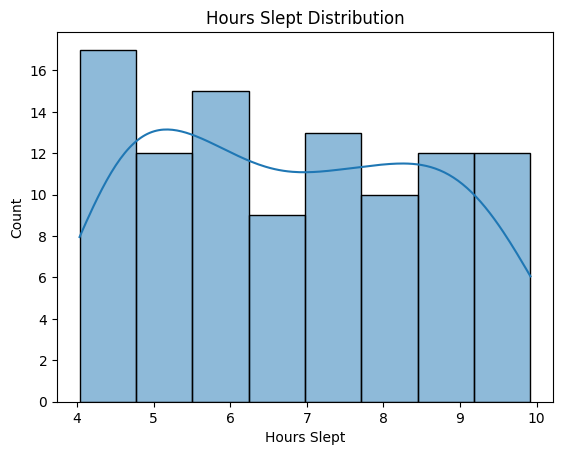

In [16]:
sns.histplot(data3['Hours Slept'], kde=True)
plt.title("Hours Slept Distribution")
plt.show()

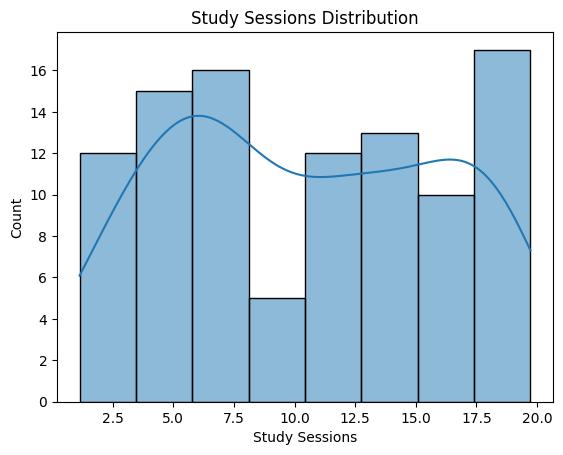

In [17]:
sns.histplot(data3['Study Sessions'], kde=True)
plt.title("Study Sessions Distribution")
plt.show()


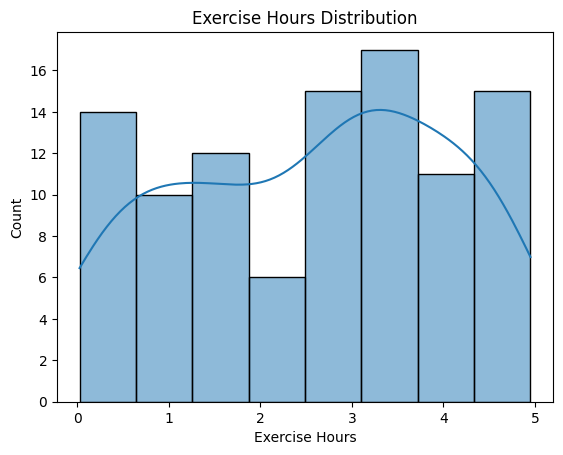

In [18]:
sns.histplot(data3['Exercise Hours'], kde=True)
plt.title("Exercise Hours Distribution")
plt.show()

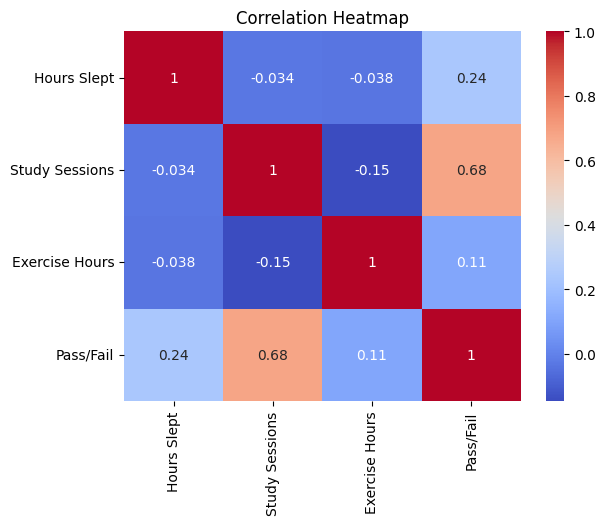

In [19]:
sns.heatmap(data3.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [20]:
y3_probs = model3.predict_proba(X3_test)[:, 1]  # Use predicted probabilities
fpr, tpr, thresholds = roc_curve(y3_test, y3_probs)


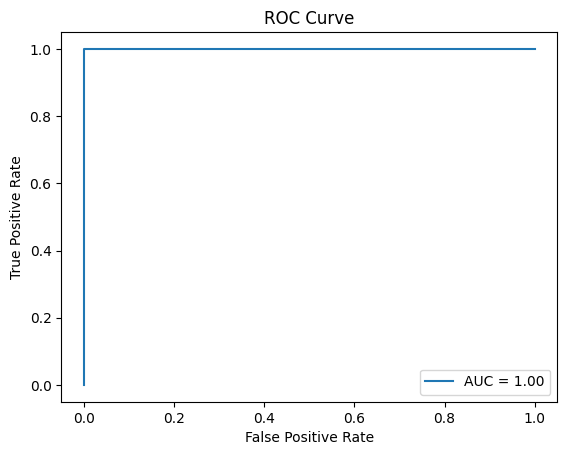

In [21]:
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y3_test, y3_probs):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()